In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.cluster import KMeans
import colorsys
from skimage import filters
from skimage import exposure

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pathfile1 = '/content/drive/MyDrive/Dr.Saberioon Tasks/Task1/20220309_Liq_manure143133.jpg'
pathfile2 = '/content/drive/MyDrive/Dr.Saberioon Tasks/Task1/20220309_Liq_manure143135.jpg'
pathfile3 = '/content/drive/MyDrive/Dr.Saberioon Tasks/Task1/20220309_liq_manure143248.jpg'
pathfile4 = '/content/drive/MyDrive/Dr.Saberioon Tasks/Task1/20220316_liq_manure142845.jpg'
pathfile5 = '/content/drive/MyDrive/Dr.Saberioon Tasks/Task1/20220316_liqmanure142858.jpg'

def imread_func(pathfile, Rotate_to_Original): 
  '''
    Rotate_to_Original must be either True or False

    cv2.imread uses BGR format to read data
    plt.imread uses RGB format to read data. However, plt flips the image. Thus, we use [::-1,::-1] to rotate image to the original format.

  '''
  if Rotate_to_Original:
    img = plt.imread(pathfile)[::-1,::-1]
  else:
    img = plt.imread(pathfile)
  return img

img1 = imread_func('/content/drive/MyDrive/Dr.Saberioon Tasks/Task1/20220309_Liq_manure143133.jpg', True)
img2 = imread_func('/content/drive/MyDrive/Dr.Saberioon Tasks/Task1/20220309_Liq_manure143135.jpg', True)
img3 = imread_func('/content/drive/MyDrive/Dr.Saberioon Tasks/Task1/20220309_liq_manure143248.jpg', True)
img4 = imread_func('/content/drive/MyDrive/Dr.Saberioon Tasks/Task1/20220316_liq_manure142845.jpg', True)
img5 = imread_func('/content/drive/MyDrive/Dr.Saberioon Tasks/Task1/20220316_liqmanure142858.jpg', True)


# All above images are in Uint8 format. So, they vary between 0 and 255. In this step, all of them are bring to 0-1 for more comfortable future process.
# The same as im2double function in Matlab
# Min and Max global of all images were 0 and 255, repeectively.

def im2double_func(img):
  '''
      output = (inputimage-min)/(max-min)
  '''
  out = img/255

  return out

img1 = im2double_func(img1)
img2 = im2double_func(img2)
img3 = im2double_func(img3)
img4 = im2double_func(img4)
img5 = im2double_func(img5)

In [ ]:
def change_colorspace(img, to_save_or_not, output_save_name): 
  
  # to_save_or_not must be Boolean.

  hsv = np.zeros_like(img)
  hls = np.zeros_like(img)
  yiq = np.zeros_like(img)

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      hsv[i,j,0], hsv[i,j,1], hsv[i,j,2] = colorsys.rgb_to_hsv(img[i,j,0], img[i,j,1], img[i,j,2])
      hls[i,j,0], hls[i,j,1], hls[i,j,2] = colorsys.rgb_to_hls(img[i,j,0], img[i,j,1], img[i,j,2])
      yiq[i,j,0], hls[i,j,1], hls[i,j,2] = colorsys.rgb_to_yiq(img[i,j,0], img[i,j,1], img[i,j,2])

  if to_save_or_not:
    filename = output_save_name + 'hsv' + '.jpg'
    cv2.imwrite(filename, hsv[::-1,::-1]*255)

    filename = output_save_name + 'hls' + '.jpg'
    cv2.imwrite(filename, hls[::-1,::-1]*255)

    filename = output_save_name + 'yiq' + '.jpg'
    cv2.imwrite(filename, yiq[::-1,::-1]*255)

  return hsv, hls, yiq

In [ ]:
hsv1, hls1, yiq1 = change_colorspace(img1, True, 'img1_')
hsv2, hls2, yiq2 = change_colorspace(img2, True, 'img2_')
hsv3, hls3, yiq3 = change_colorspace(img3, True, 'img3_')
hsv4, hls4, yiq4 = change_colorspace(img4, True, 'img4_')
hsv5, hls5, yiq5 = change_colorspace(img5, True, 'img5_')

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def kmeans_clustering(img, n_of_clusters, init_value, to_save_or_not, output_save_name):
  '''
    init_value must be either 'random' or 'k-means++' (default)
    to_save_or_not: True or False
  '''

  kmeans = KMeans(n_clusters=n_of_clusters, init = init_value).fit(np.reshape(img,(-1,img.shape[2])))
  clustered_img = np.reshape(kmeans.predict(np.reshape(img,(-1,img.shape[2]))), img.shape[:-1])

  if to_save_or_not:
    filename = output_save_name + '_clustered.jpg'
    cv2.imwrite(filename, clustered_img[::-1,::-1])

  return clustered_img


In [ ]:
clustered_img1 = kmeans_clustering(img1, 2 , 'random', True, 'img1')
clustered_hls1 = kmeans_clustering(hls1, 2 , 'random', True, 'hls1')
clustered_hsv1 = kmeans_clustering(hsv1, 2 , 'random', True, 'hsv1')
clustered_yiq1 = kmeans_clustering(yiq1, 2 , 'random', True, 'yiq1')

clustered_img2 = kmeans_clustering(img2, 2 , 'random', True, 'img2')
clustered_hls2 = kmeans_clustering(hls2, 2 , 'random', True, 'hls2')
clustered_hsv2 = kmeans_clustering(hsv2, 2 , 'random', True, 'hsv2')
clustered_yiq2 = kmeans_clustering(yiq2, 2 , 'random', True, 'yiq2')

clustered_img3 = kmeans_clustering(img3, 2 , 'random', True, 'img3')
clustered_hls3 = kmeans_clustering(hls3, 2 , 'random', True, 'hls3')
clustered_hsv3 = kmeans_clustering(hsv3, 2 , 'random', True, 'hsv3')
clustered_yiq3 = kmeans_clustering(yiq3, 2 , 'random', True, 'yiq3')

clustered_img4 = kmeans_clustering(img4, 2 , 'random', True, 'img4')
clustered_hls4 = kmeans_clustering(hls4, 2 , 'random', True, 'hls4')
clustered_hsv4 = kmeans_clustering(hsv4, 2 , 'random', True, 'hsv4')
clustered_yiq4 = kmeans_clustering(yiq4, 2 , 'random', True, 'yiq4')

clustered_img5 = kmeans_clustering(img5, 2 , 'random', True, 'img5')
clustered_hls5 = kmeans_clustering(hls5, 2 , 'random', True, 'hls5')
clustered_hsv5 = kmeans_clustering(hsv5, 2 , 'random', True, 'hsv5')
clustered_yiq5 = kmeans_clustering(yiq5, 2 , 'random', True, 'yiq5')

In [ ]:
!pip install -U scikit-fuzzy

In [ ]:
import skfuzzy as fuzz

In [ ]:
def fuzzy_cmans_automatic_Th(img, n_of_clusters, to_save_or_not, output_save_name):
  cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(np.reshape(img,(-1,img.shape[2])), n_of_clusters, 2, error=0.005, maxiter=1000, init=None)
  cluster1 = np.reshape(cntr[0,:], img.shape[:-1])
  cluster2 = np.reshape(cntr[1,:], img.shape[:-1])

  cluster1_img = np.zeros((img.shape[0], img.shape[1]))
  cluster2_img = np.zeros((img.shape[0], img.shape[1]))

  val1 = filters.threshold_otsu(cluster1)
  cluster1_img[cluster1 < val1]=1

  val2 = filters.threshold_otsu(cluster2)
  cluster2_img[cluster2 < val2]=1

  if to_save_or_not:
    filename = output_save_name + '_cluster1.jpg'
    cv2.imwrite(filename, cluster1_img[::-1,::-1])

    filename = output_save_name + '_cluster2.jpg'
    cv2.imwrite(filename, cluster2_img[::-1,::-1])

  return cluster1_img, cluster2_img

In [ ]:
hls1_cluster1, hls1_cluster2 = fuzzy_cmans_automatic_Th(hls1, 2, True, 'hls1')
hls2_cluster1, hls2_cluster2 = fuzzy_cmans_automatic_Th(hls2, 2, True, 'hls2')
hls3_cluster1, hls3_cluster2 = fuzzy_cmans_automatic_Th(hls3, 2, True, 'hls3')
hls4_cluster1, hls4_cluster2 = fuzzy_cmans_automatic_Th(hls4, 2, True, 'hls4')
hls5_cluster1, hls5_cluster2 = fuzzy_cmans_automatic_Th(hls5, 2, True, 'hls5')

In [ ]:
# For sample plotting and showing

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(np.reshape(hls5,(-1,hls5.shape[2])), 2, 2, error=0.005, maxiter=1000, init=None)
cluster1 = np.reshape(cntr[0,:], hls5.shape[:-1])
cluster2 = np.reshape(cntr[1,:], hls5.shape[:-1])

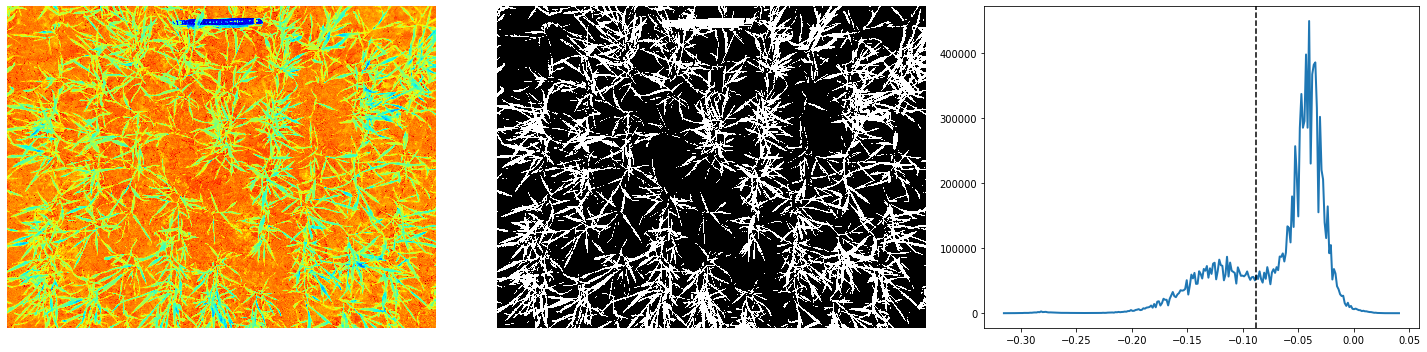

In [ ]:
target = cluster1


val = filters.threshold_otsu(target)
hist, bins_center = exposure.histogram(target)
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.imshow(target, cmap='jet', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(target < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

plt.tight_layout()
plt.show()